In [5]:
from warnings import filterwarnings as f
f('ignore')

In [7]:
import pandas as pd

df = pd.read_csv('LEVX for DAP.csv')
display(df.head())


Unnamed: 0        Unnamed: 1  Temperature  Dew Point Temperature  \
0           0  01-01-2008 00:00   278.550001             277.950000   
1           1  01-01-2008 01:00   278.050000             277.450001   
2           2  01-01-2008 02:00   278.050000             277.649999   
3           3  01-01-2008 02:30   276.150001             275.149999   
4           4  01-01-2008 03:00   278.750001             277.549999   

   Relative Humidity  Wind Direction  Wind Speed Wind Gust  \
0              95.91             220    3.601108         M   
1              95.89             230    3.086664         M   
2              97.24             190    5.144440         M   
3              93.14             240    3.601108         M   
4              91.98             230    3.086664         M   

   Sea Level Pressure  Visibility  
0              1023.0      9994.0  
1                 NaN         NaN  
2              1022.0      9656.0  
3              1021.0      9656.0  
4              1022.0      9994.0

In [9]:
# Check the shape of the DataFrame
print(f"DataFrame shape: {df.shape}")

# Check the data types of each column
print("\nData types of columns:")
print(df.dtypes)

# Generate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
numerical_cols = ['Temperature', 'Relative Humidity', 'Wind Speed', 'Wind Gust', 'Sea Level Pressure', 'Visibility']
print(df[numerical_cols].describe())

# Identify the presence of missing values
print("\nMissing values in specific columns:")
cols_to_check = ['Temperature', 'Dew Point Temperature', 'Relative Humidity', 'Wind Direction', 'Wind Speed', 'Wind Gust', 'Sea Level Pressure', 'Visibility']
print(df[cols_to_check].isnull().sum())



DataFrame shape: (229250, 10)

Data types of columns:
Unnamed: 0                 int64
Unnamed: 1                object
Temperature              float64
Dew Point Temperature    float64
Relative Humidity        float64
Wind Direction             int64
Wind Speed               float64
Wind Gust                 object
Sea Level Pressure       float64
Visibility               float64
dtype: object

Descriptive statistics for numerical columns:
         Temperature  Relative Humidity     Wind Speed  Sea Level Pressure  \
count  228703.000000      228585.000000  221240.000000       227514.000000   
mean      287.096718          80.162597       2.934942         1018.050006   
std         5.765104          17.378572       2.021558            7.465096   
min       270.150000           9.110000       0.000000          971.000000   
25%       283.150000          68.750000       1.543332         1015.000000   
50%       286.150001          82.980000       2.572220         1019.000000   
75%      

In [11]:
# Fill missing values in numerical columns with the mean
numerical_cols = ['Temperature','Dew Point Temperature', 'Relative Humidity', 'Wind Speed', 'Sea Level Pressure', 'Visibility']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing values in 'Wind Direction' with the mode
df['Wind Direction'] = df['Wind Direction'].fillna(df['Wind Direction'].mode()[0])

# Check if there are still missing values in the specified columns
cols_to_check = [
    'Temperature', 
    'Relative Humidity', 
    'Wind Direction', 
    'Wind Speed', 
    'Wind Gust', 
    'Sea Level Pressure', 
    'Dew Point Temperature',  # originally 'time' is now represented as 'Dew Point'
    'Visibility'
]
print(df[cols_to_check].isnull().sum())


Temperature              0
Relative Humidity        0
Wind Direction           0
Wind Speed               0
Wind Gust                0
Sea Level Pressure       0
Dew Point Temperature    0
Visibility               0
dtype: int64


In [13]:
# Extract the current second column name
second_col_name = df.columns[1]
# Rename it using a dictionary
df = df.rename(columns={second_col_name: 'time'})


In [15]:
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y %H:%M')
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df['second'] = df['time'].dt.second
display(df.head())

Unnamed: 0                time  Temperature  Dew Point Temperature  \
0           0 2008-01-01 00:00:00   278.550001             277.950000   
1           1 2008-01-01 01:00:00   278.050000             277.450001   
2           2 2008-01-01 02:00:00   278.050000             277.649999   
3           3 2008-01-01 02:30:00   276.150001             275.149999   
4           4 2008-01-01 03:00:00   278.750001             277.549999   

   Relative Humidity  Wind Direction  Wind Speed Wind Gust  \
0              95.91             220    3.601108         M   
1              95.89             230    3.086664         M   
2              97.24             190    5.144440         M   
3              93.14             240    3.601108         M   
4              91.98             230    3.086664         M   

   Sea Level Pressure   Visibility  year  month  day  hour  minute  second  
0         1023.000000  9994.000000  2008      1    1     0       0       0  
1         1018.050006  8247.670666  2008      1    1     1       0       0  
2         1022.000000  9656.000000  2008      1    1     2       0       0  
3         1021.000000  9656.000000  2008      1    1     2      30       0  
4         1022.000000  9994.000000  2008      1    1     3       0       0

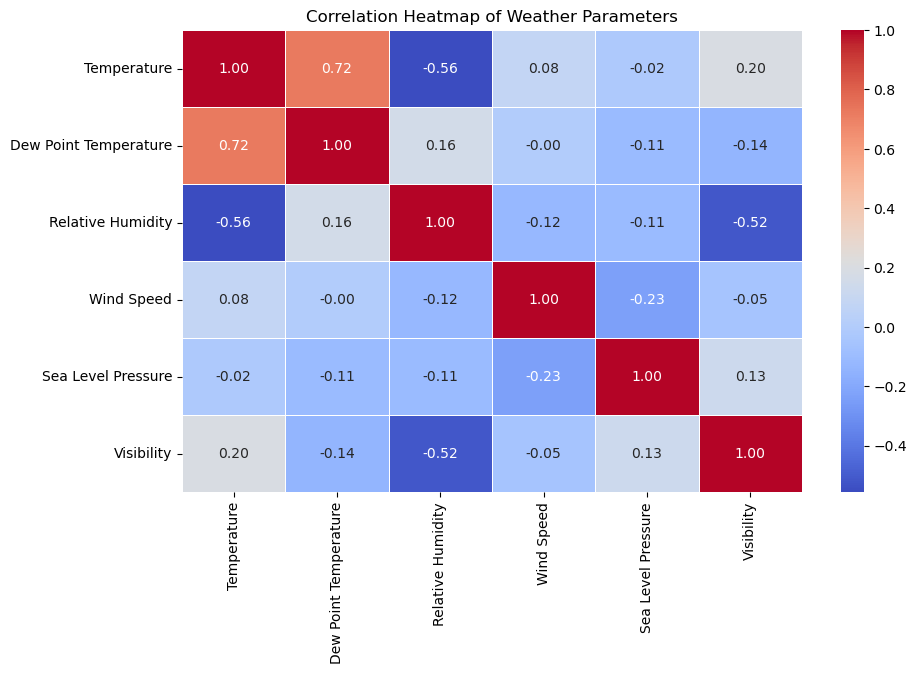

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Selecting relevant columns for analysis using descriptive names
columns_to_analyze = [
    'Temperature', 
    'Dew Point Temperature',  # Renamed column here
    'Relative Humidity', 
    'Wind Speed', 
    'Sea Level Pressure', 
    'Visibility'
]
df_selected = df[columns_to_analyze]

# Checking for correlations between parameters
correlation_matrix = df_selected.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Weather Parameters")
plt.show()


In [33]:
# Checking data types of selected columns
df_selected.dtypes


Temperature              float64
Dew Point Temperature    float64
Relative Humidity        float64
Wind Speed               float64
Sea Level Pressure       float64
Visibility               float64
dtype: object

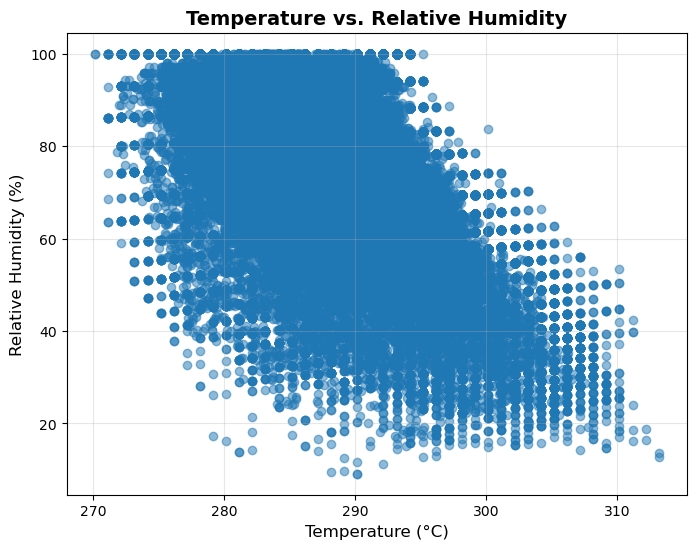

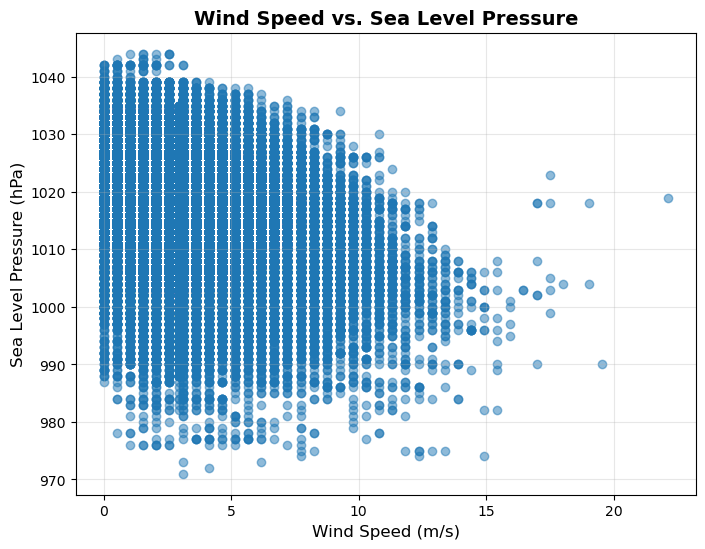

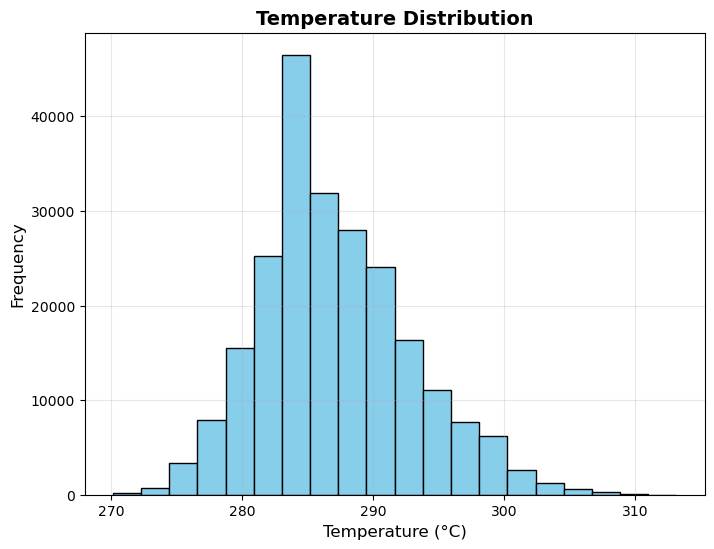

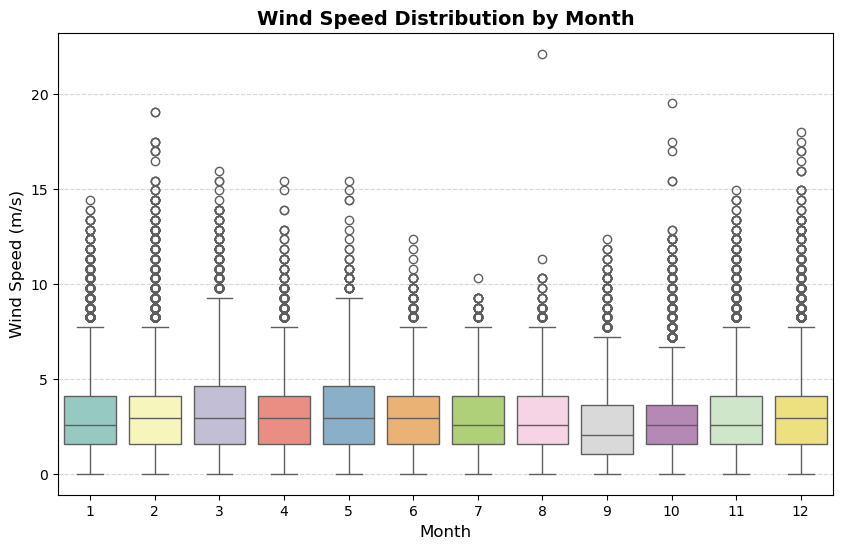

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Temperature vs. Relative Humidity
plt.figure(figsize=(8, 6))
plt.scatter(df['Temperature'], df['Relative Humidity'], alpha=0.5)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Relative Humidity (%)', fontsize=12)
plt.title('Temperature vs. Relative Humidity', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

# Scatter plot: Wind Speed vs. Sea Level Pressure
plt.figure(figsize=(8, 6))
plt.scatter(df['Wind Speed'], df['Sea Level Pressure'], alpha=0.5)
plt.xlabel('Wind Speed (m/s)', fontsize=12)
plt.ylabel('Sea Level Pressure (hPa)', fontsize=12)
plt.title('Wind Speed vs. Sea Level Pressure', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

# Histogram: Temperature Distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Temperature'], bins=20, color="skyblue", edgecolor="black")
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Temperature Distribution', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

# Box plot: Wind Speed by Month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='Wind Speed', data=df, palette='Set3')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.title('Wind Speed Distribution by Month', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.show()




Original shape: (229250, 6)
Cleaned shape: (167751, 6)


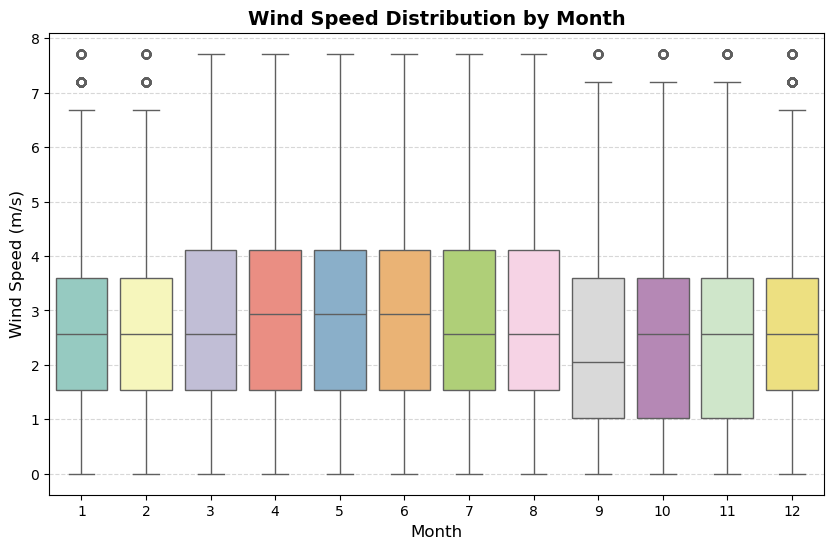

In [35]:
## Outlier removal using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Applying outlier removal for all selected columns
df_cleaned = df_selected.copy()
for col in columns_to_analyze:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

# Checking shape before and after outlier removal
print("Original shape:", df_selected.shape)
print("Cleaned shape:", df_cleaned.shape)

df_cleaned['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y %H:%M')
df_cleaned['year'] = df['time'].dt.year
df_cleaned['month'] = df['time'].dt.month
df_cleaned['day'] = df['time'].dt.day
df_cleaned['hour'] = df['time'].dt.hour
df_cleaned['minute'] = df['time'].dt.minute
df_cleaned['second'] = df['time'].dt.second

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='Wind Speed', data=df_cleaned, palette='Set3')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.title('Wind Speed Distribution by Month', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.show()



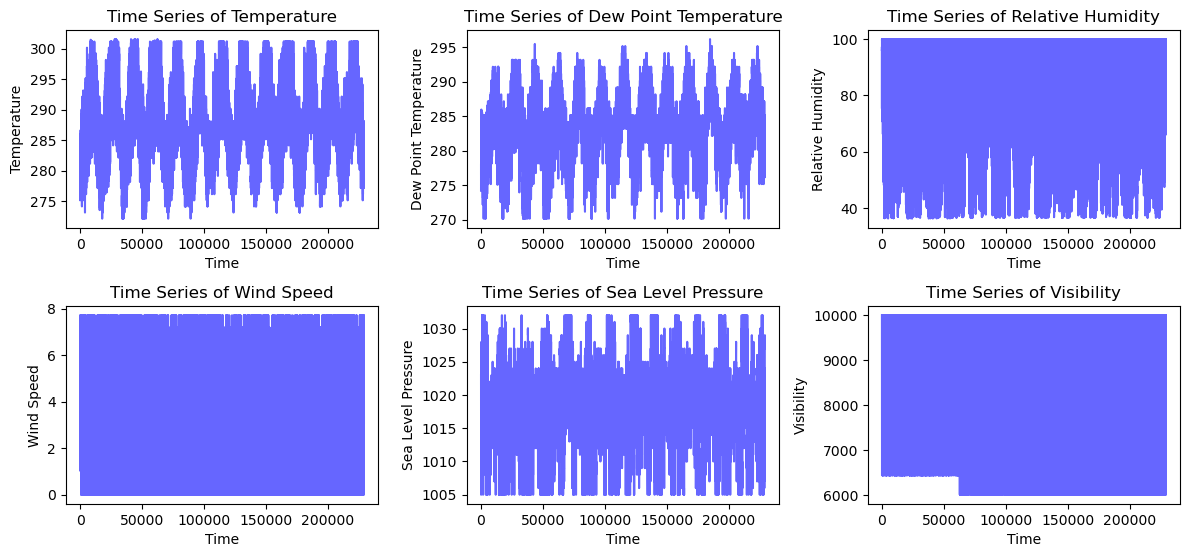

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Creating subplots for different weather parameters over time
for i, col in enumerate(columns_to_analyze, 1):
    plt.subplot(3, 3, i)
    plt.plot(df_cleaned.index, df_cleaned[col], color='blue', alpha=0.6)
    plt.title(f"Time Series of {col}")
    plt.xlabel("Time")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


<Figure size 800x800 with 0 Axes>

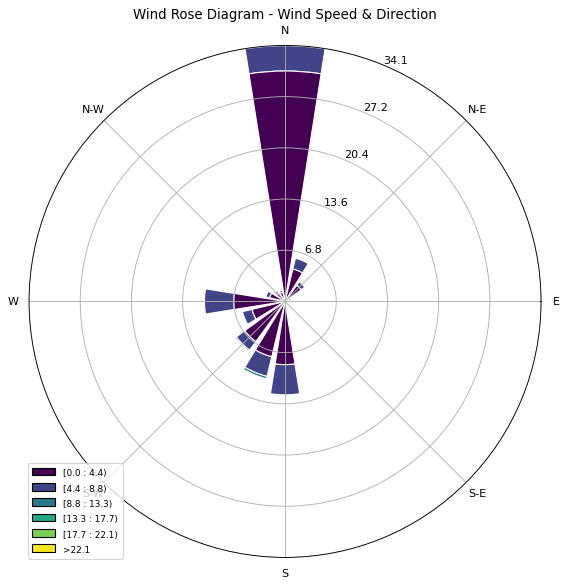

In [41]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Ensure wind direction data exists using the descriptive column name
if 'Wind Direction' in df.columns:
    wind_dir_col = 'Wind Direction'

    # Plot Wind Rose using the descriptive column for Wind Speed
    plt.figure(figsize=(8, 8))
    ax = WindroseAxes.from_ax()
    ax.bar(df[wind_dir_col], df['Wind Speed'], normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()
    plt.title("Wind Rose Diagram - Wind Speed & Direction")
    plt.show()
else:
    print("Wind direction data not available.")


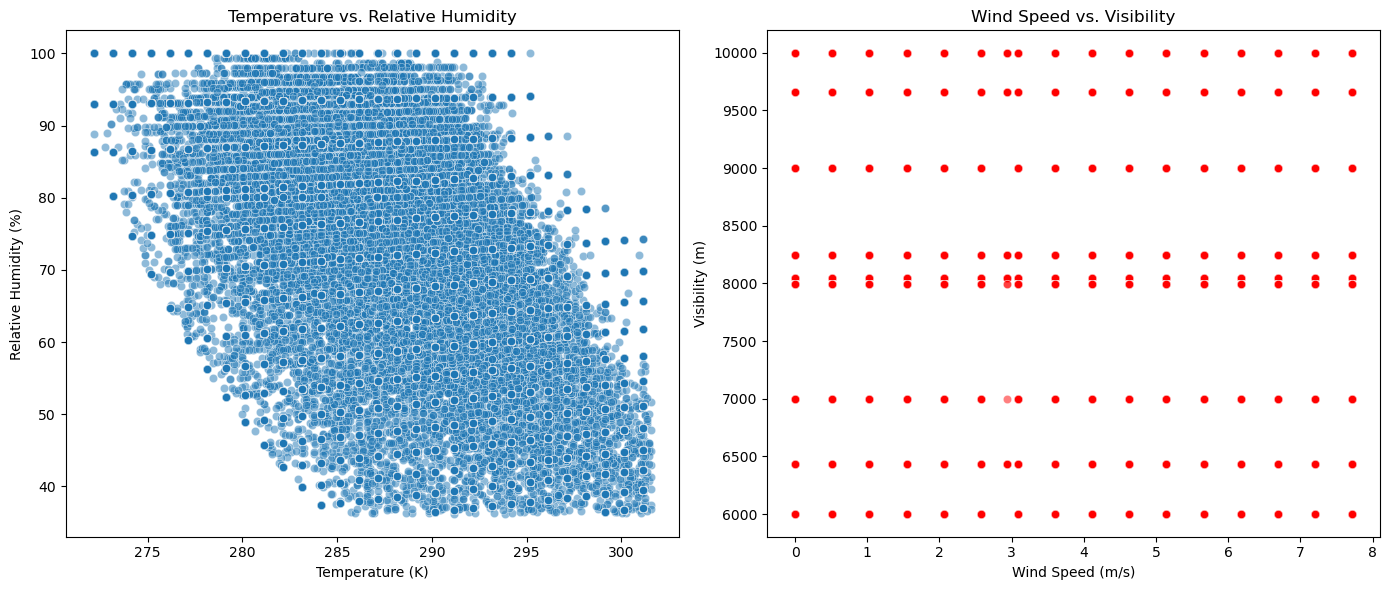

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot: Temperature vs. Relative Humidity
sns.scatterplot(
    x=df_cleaned["Temperature"], 
    y=df_cleaned["Relative Humidity"], 
    ax=axes[0], 
    alpha=0.5
)
axes[0].set_title("Temperature vs. Relative Humidity")
axes[0].set_xlabel("Temperature (K)")
axes[0].set_ylabel("Relative Humidity (%)")

# Scatter plot: Wind Speed vs. Visibility
sns.scatterplot(
    x=df_cleaned["Wind Speed"], 
    y=df_cleaned["Visibility"], 
    ax=axes[1], 
    alpha=0.5, 
    color="red"
)
axes[1].set_title("Wind Speed vs. Visibility")
axes[1].set_xlabel("Wind Speed (m/s)")
axes[1].set_ylabel("Visibility (m)")

plt.tight_layout()
plt.show()


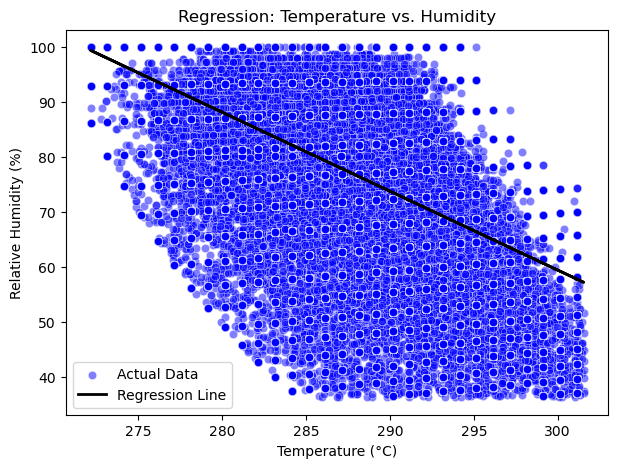

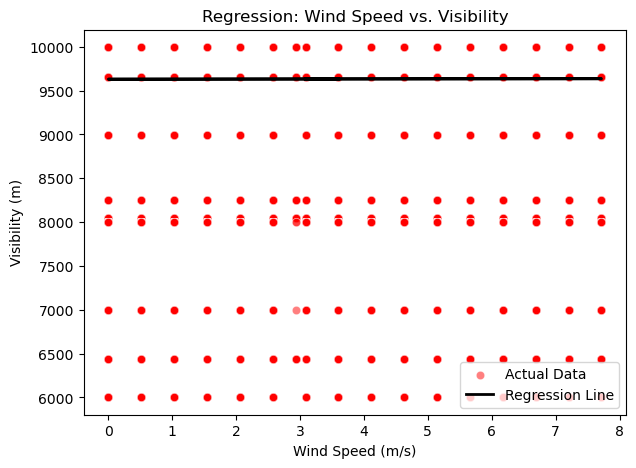

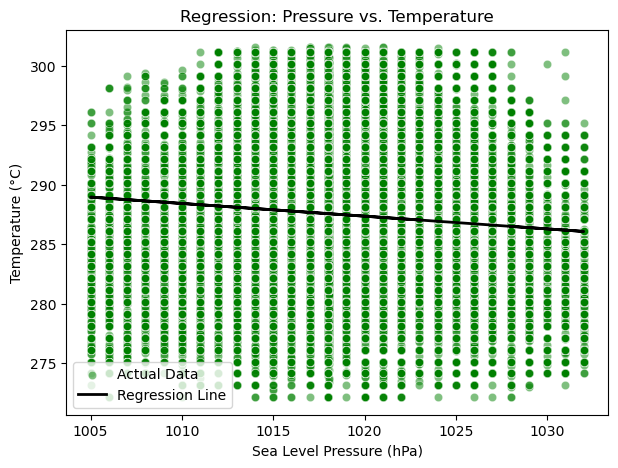

Temperature vs. Humidity Regression Summary:
                            OLS Regression Results                            
Dep. Variable:      Relative Humidity   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                 6.308e+04
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:26:25   Log-Likelihood:            -6.6833e+05
No. Observations:              167751   AIC:                         1.337e+06
Df Residuals:                  167749   BIC:                         1.337e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const

In [70]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

def regression_analysis(x, y, x_label, y_label, title, color="blue"):
    # Add constant for intercept
    X = sm.add_constant(df_cleaned[x])
    # Fit OLS regression model
    model = sm.OLS(df_cleaned[y], X).fit()
    predictions = model.predict(X)

    # Plot scatter plot and regression line
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=df_cleaned[x], y=df_cleaned[y], alpha=0.5, color=color, label="Actual Data")
    plt.plot(df_cleaned[x], predictions, color="black", linewidth=2, label="Regression Line")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

    return model.summary()

# Perform regression and get statistical summaries using descriptive column names
temp_humidity_summary = regression_analysis(
    "Temperature", "Relative Humidity", 
    "Temperature (°C)", "Relative Humidity (%)", 
    "Regression: Temperature vs. Humidity"
)

wind_visibility_summary = regression_analysis(
    "Wind Speed", "Visibility", 
    "Wind Speed (m/s)", "Visibility (m)", 
    "Regression: Wind Speed vs. Visibility",
    color="red"
)

pressure_temp_summary = regression_analysis(
    "Sea Level Pressure", "Temperature", 
    "Sea Level Pressure (hPa)", "Temperature (°C)", 
    "Regression: Pressure vs. Temperature",
    color="green"
)

# Display regression summaries
print("Temperature vs. Humidity Regression Summary:")
print(temp_humidity_summary)

print("\nWind Speed vs. Visibility Regression Summary:")
print(wind_visibility_summary)

print("\nPressure vs. Temperature Regression Summary:")
print(pressure_temp_summary)


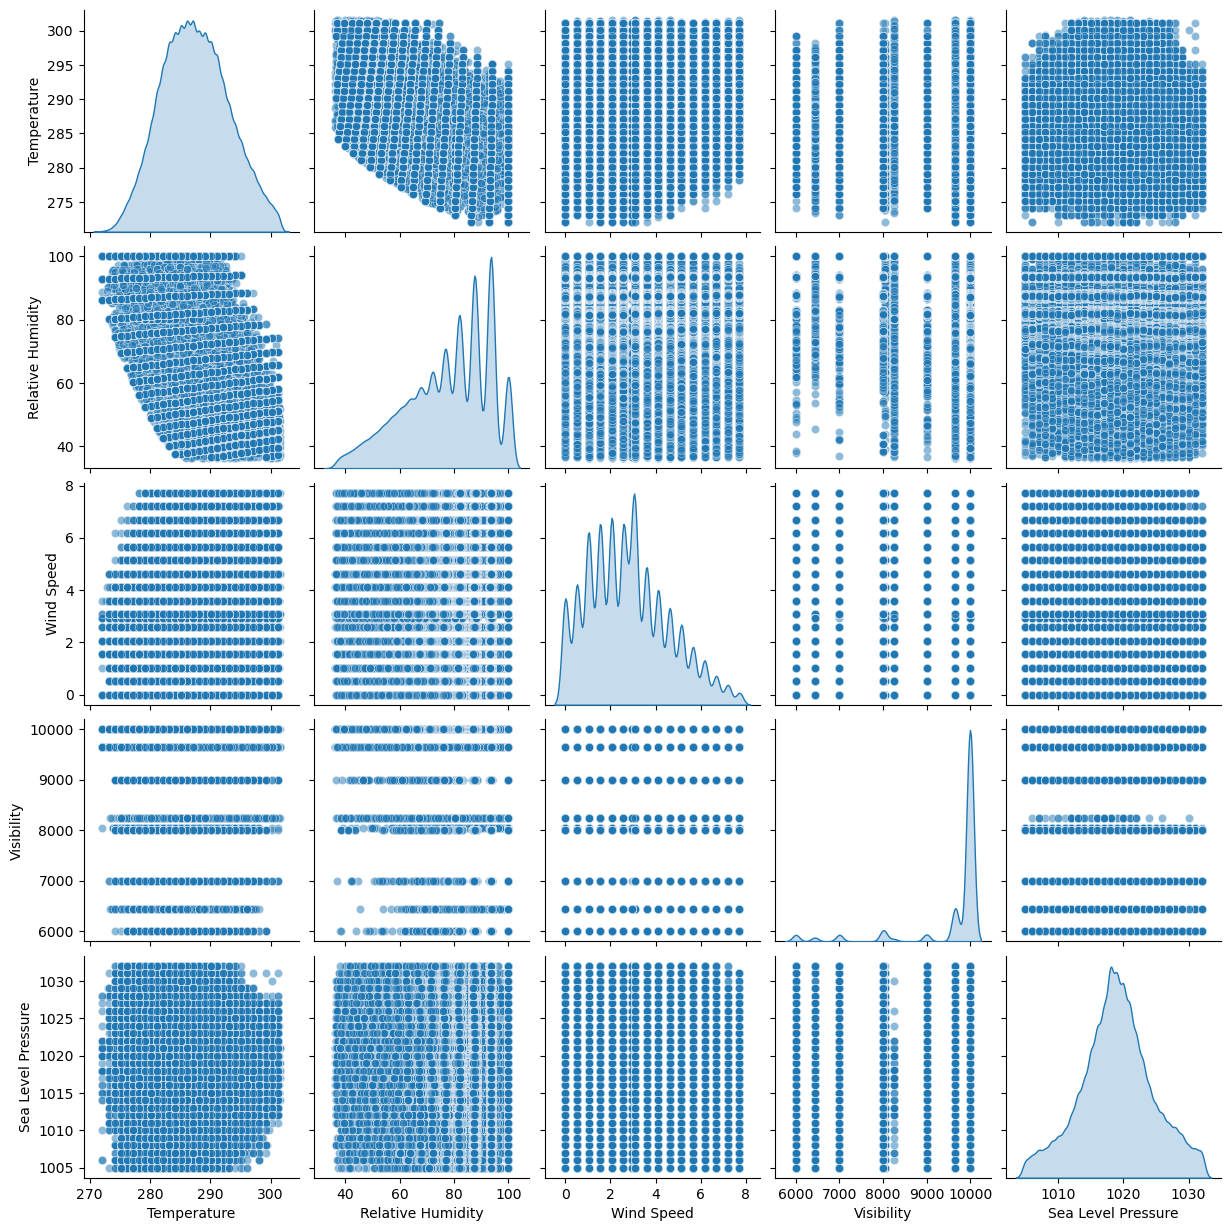

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns for pair plotting with descriptive names
pairplot_columns = [
    "Temperature", 
    "Relative Humidity", 
    "Wind Speed", 
    "Visibility", 
    "Sea Level Pressure"
]

# Creating the pair plot with KDE on the diagonal
sns.pairplot(df_cleaned[pairplot_columns], diag_kind="kde", plot_kws={"alpha": 0.5})

# Display the plot
plt.show()

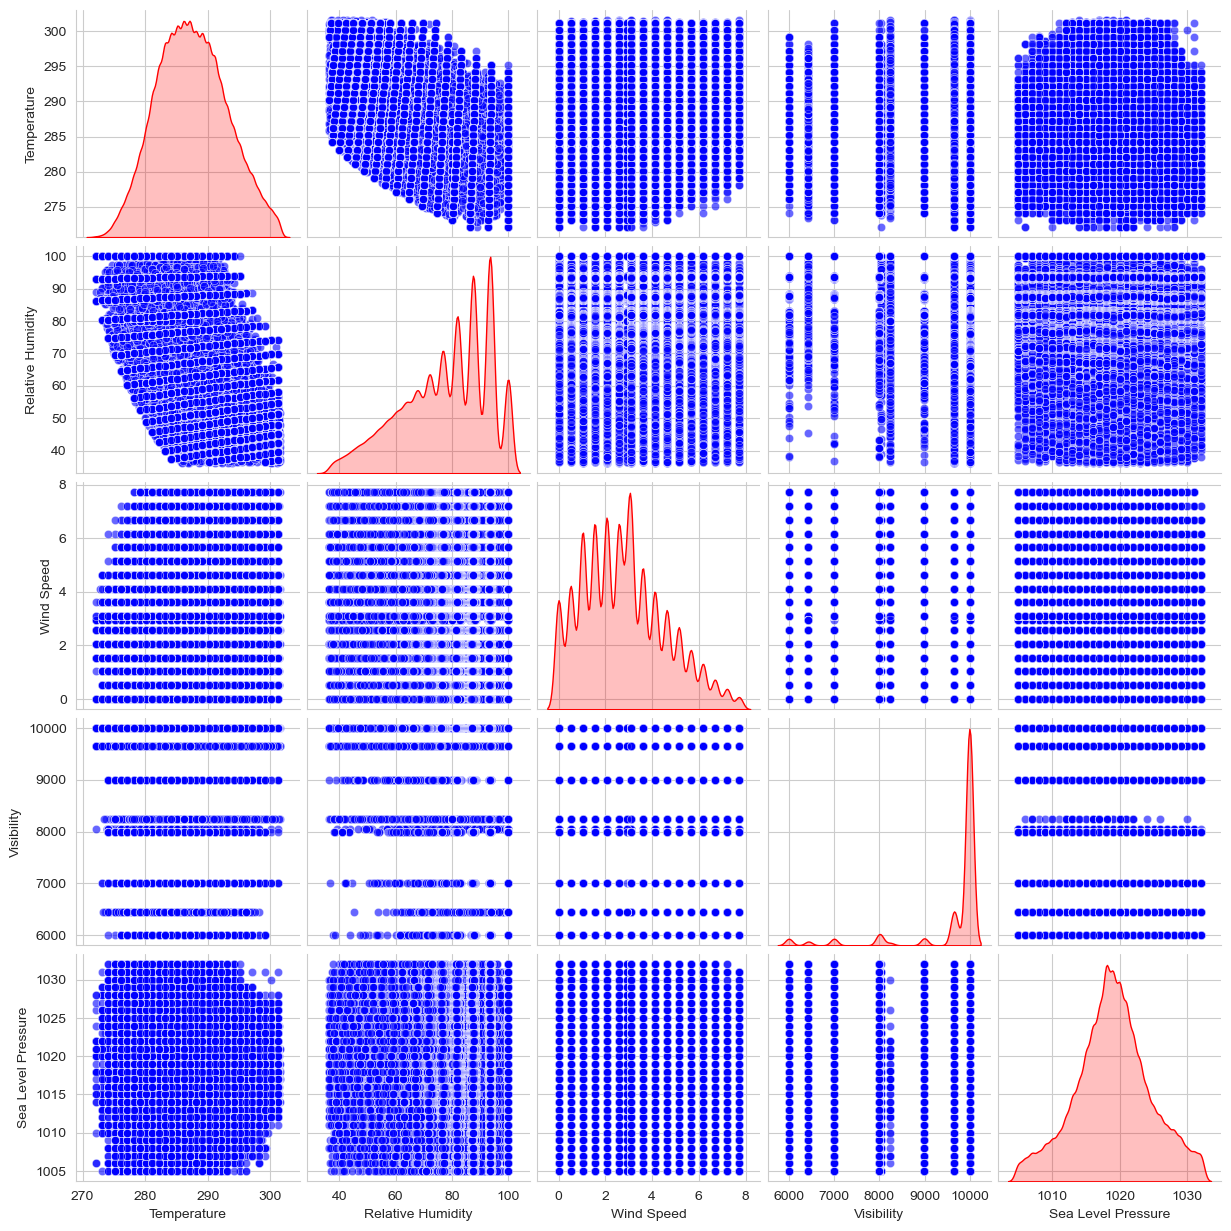

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a more vibrant color palette
sns.set_palette("husl")  # Try "husl", "coolwarm", "tab10", or "Set2" for variety
pairplot_columns = [
    "Temperature", 
    "Relative Humidity", 
    "Wind Speed", 
    "Visibility", 
    "Sea Level Pressure"
]
sns.set_style("whitegrid")

# Creating the pair plot with KDE on the diagonal
pairplot = sns.pairplot(
    df_cleaned[pairplot_columns], 
    diag_kind="kde", 
    plot_kws={"alpha": 0.6, "color": "blue"},
    diag_kws={"color": "red"}
)

# Display the plot
plt.show()


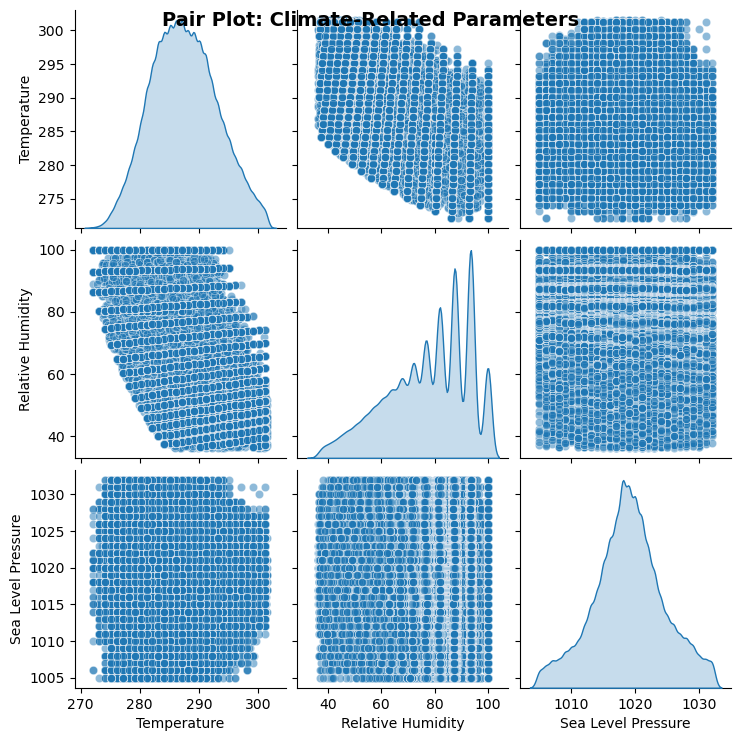

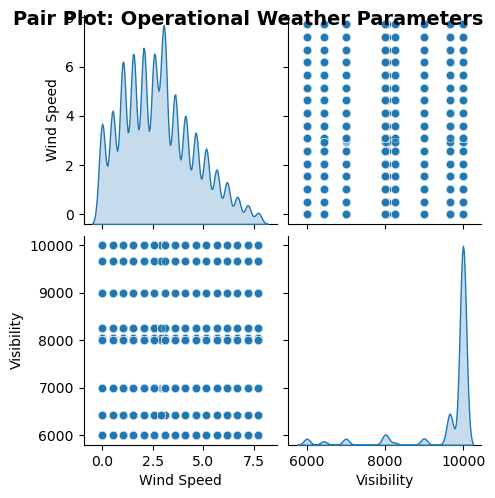

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define first subset: Climate-related parameters
climate_columns = ["Temperature", "Relative Humidity", "Sea Level Pressure"]
sns.pairplot(df_cleaned[climate_columns], diag_kind="kde", plot_kws={"alpha": 0.5})
plt.suptitle("Pair Plot: Climate-Related Parameters", fontsize=14, fontweight="bold")
plt.show()

# Define second subset: Operational weather parameters
operation_columns = ["Wind Speed", "Visibility"]
sns.pairplot(df_cleaned[operation_columns], diag_kind="kde", plot_kws={"alpha": 0.5}, markers="o")
plt.suptitle("Pair Plot: Operational Weather Parameters", fontsize=14, fontweight="bold")
plt.show()


In [46]:
import pandas as pd

# Define function to determine season based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Convert 'Month' column to numeric (if it's not already)
df_cleaned["month"] = pd.to_numeric(df_cleaned["month"], errors="coerce")

# Apply the function to create a new 'Season' column
df_cleaned["season"] = df_cleaned["month"].apply(get_season)

# Convert 'Hour' column to numeric (if needed)
df_cleaned["hour"] = pd.to_numeric(df_cleaned["hour"], errors="coerce")

# Group the data by 'Season' and 'Hour' and calculate mean Temperature & Relative Humidity
df_season_hour = (
    df_cleaned.groupby(["season", "hour"])[["Temperature", "Relative Humidity"]]
    .mean()
    .reset_index()
)

# Display the resulting DataFrame
print(df_season_hour.head())  # Shows the first few rows


   season  hour  Temperature  Relative Humidity
0  Autumn     0   286.725914          84.156988
1  Autumn     1   286.540551          84.906496
2  Autumn     2   286.266475          85.670080
3  Autumn     3   286.074451          86.281402
4  Autumn     4   285.860606          86.550553


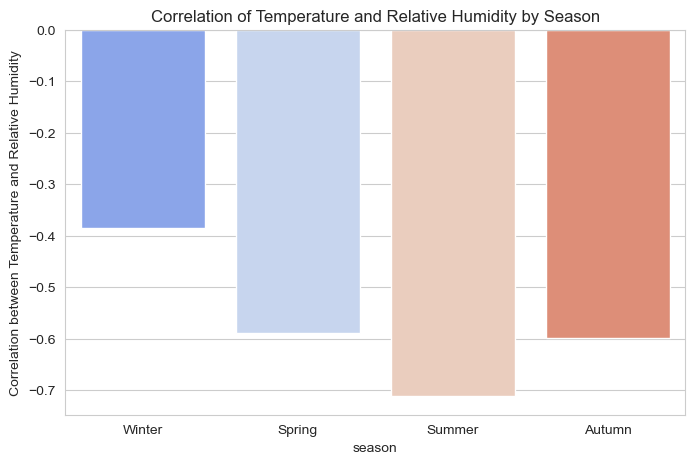

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the 'Season' column exists in the dataset; if not, create it beforehand.
df_cleaned["season"] = pd.Categorical(
    df_cleaned["season"],
    categories=["Winter", "Spring", "Summer", "Autumn"],
    ordered=True
)

# Group by Season and calculate the correlation between Temperature and Relative Humidity
seasonal_corr = (
    df_cleaned.groupby("season")[["Temperature", "Relative Humidity"]]
    .corr()
    .unstack()
    .iloc[:, 1]  # Selects the correlation between Temperature and Relative Humidity
)

# Plot the correlation values as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_corr.index, y=seasonal_corr.values, palette="coolwarm")

# Labels and title
plt.xlabel("season")
plt.ylabel("Correlation between Temperature and Relative Humidity")
plt.title("Correlation of Temperature and Relative Humidity by Season")

# Show the plot
plt.show()

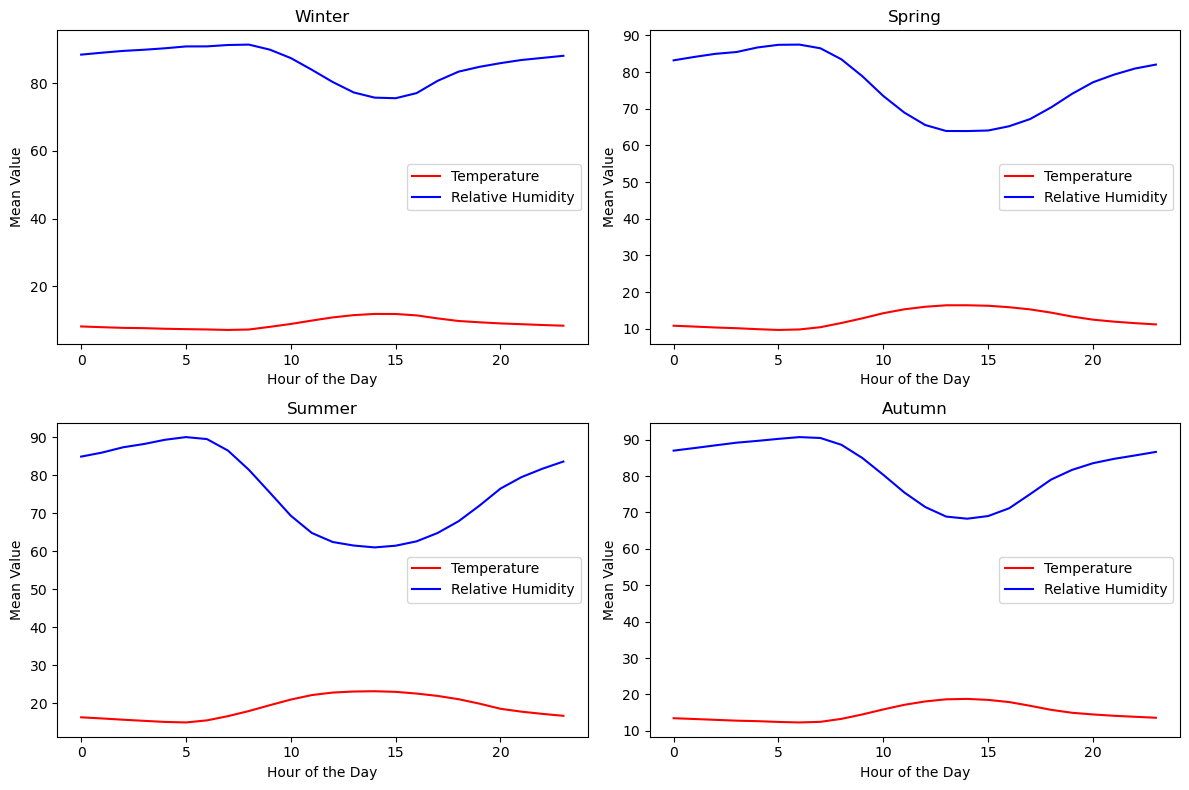

In [74]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Set the DataFrame index to "Season" (using the descriptive name)
# df_season_hour.set_index("season", inplace=True)

# Define the season order (using descriptive season names)
season_order = ["Winter", "Spring", "Summer", "Autumn"]

# Create subplots for each season
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()  # Flatten for easy iteration

for i, season in enumerate(season_order):
    ax = axes[i]
    
    # Check if the season exists in the DataFrame index
    if season in df_season_hour.index:
        data = df_season_hour.loc[season]
        temperature_celsius = data["Temperature"] - 273.15
        # Plot Temperature and Relative Humidity against Hour of the Day
        ax.plot(data["hour"], temperature_celsius, label="Temperature", color="red")
        ax.plot(data["hour"], data["Relative Humidity"], label="Relative Humidity", color="blue")
        
        # Formatting the subplot
        ax.set_title(season)
        ax.set_xlabel("Hour of the Day")
        ax.set_ylabel("Mean Value")
        ax.legend()

plt.tight_layout()
plt.show()



In [78]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Select features and target
features = ["Relative Humidity", "Wind Speed", "Visibility", "Sea Level Pressure", "hour"]
target = "Temperature"


# One-hot encode the 'Season' column
df_encoded = pd.get_dummies(df_cleaned, columns=["season"], drop_first=True)

# Split the data into features and target
X = df_encoded[features]
y = df_encoded[target]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (134200, 5)
Testing Data Shape: (33551, 5)


C:\Users\mygam\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mygam\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mygam\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mygam\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

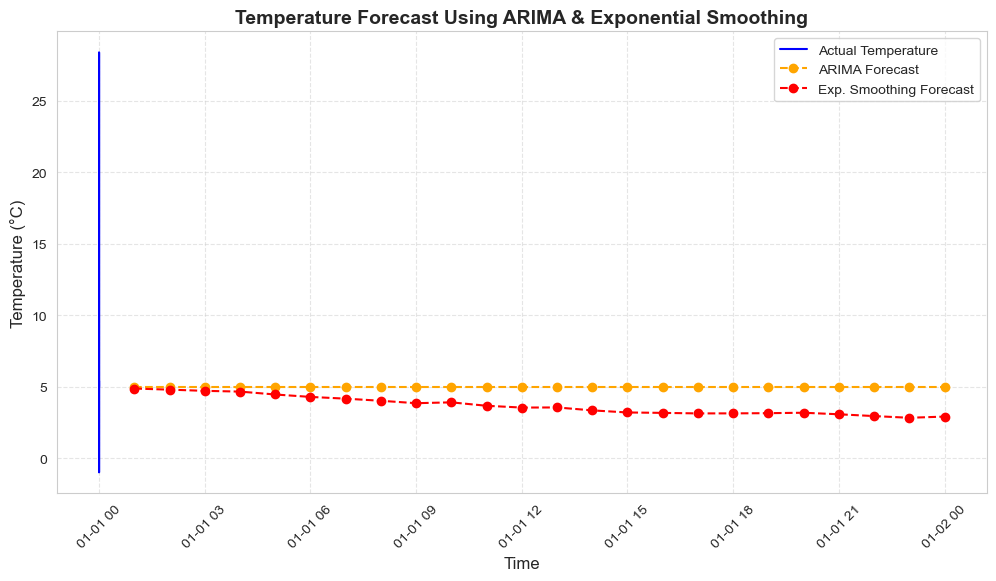

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ensure datetime index
df_cleaned.index = pd.to_datetime(df_cleaned.index, errors='coerce')

# Convert temperature from Kelvin to Celsius
temp_clean = df_cleaned["Temperature"] - 273.15  

# -------------------------------
# 📌 ARIMA Model for Forecasting
# -------------------------------
arima_model = ARIMA(temp_clean, order=(5, 1, 0))  # You can tune (p,d,q) using auto_arima
arima_fit = arima_model.fit()

# Forecast next 24 hours
forecast_steps = 24
forecast_arima = arima_fit.forecast(steps=forecast_steps)

# Create forecast index
forecast_index = pd.date_range(start=df_cleaned.index[-1], periods=forecast_steps + 1, freq="H")[1:]

# --------------------------------------
# 📌 Exponential Smoothing Forecasting
# --------------------------------------
exp_smooth = ExponentialSmoothing(temp_clean, trend="add", seasonal="add", seasonal_periods=24).fit()
forecast_exp = exp_smooth.forecast(steps=forecast_steps)

# --------------------------------------
# 📊 Plotting Both Forecasts for Comparison
# --------------------------------------
plt.figure(figsize=(12, 6))

# Actual Temperature Data
plt.plot(df_cleaned.index, temp_clean, label="Actual Temperature", color="blue")

# ARIMA Forecast
plt.plot(forecast_index, forecast_arima, label="ARIMA Forecast", linestyle="dashed", color="orange", marker="o")

# Exponential Smoothing Forecast
plt.plot(forecast_index, forecast_exp, label="Exp. Smoothing Forecast", linestyle="dashed", color="red", marker="o")

# Formatting the Plot
plt.legend(fontsize=10)
plt.title("Temperature Forecast Using ARIMA & Exponential Smoothing", fontsize=14, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.grid(alpha=0.5, linestyle='--')
plt.xticks(rotation=45)
plt.show()


In [80]:
df_cleaned.head()

Temperature  Dew Point Temperature  \
1970-01-01 00:00:00.000000000   278.550001             277.950000   
1970-01-01 00:00:00.000000001   278.050000             277.450001   
1970-01-01 00:00:00.000000002   278.050000             277.649999   
1970-01-01 00:00:00.000000003   276.150001             275.149999   
1970-01-01 00:00:00.000000004   278.750001             277.549999   

                               Relative Humidity  Wind Speed  \
1970-01-01 00:00:00.000000000              95.91    3.601108   
1970-01-01 00:00:00.000000001              95.89    3.086664   
1970-01-01 00:00:00.000000002              97.24    5.144440   
1970-01-01 00:00:00.000000003              93.14    3.601108   
1970-01-01 00:00:00.000000004              91.98    3.086664   

                               Sea Level Pressure   Visibility  \
1970-01-01 00:00:00.000000000         1023.000000  9994.000000   
1970-01-01 00:00:00.000000001         1018.050006  8247.670666   
1970-01-01 00:00:00.000000002         1022.000000  9656.000000   
1970-01-01 00:00:00.000000003         1021.000000  9656.000000   
1970-01-01 00:00:00.000000004         1022.000000  9994.000000   

                                             time  year  month  day  hour  \
1970-01-01 00:00:00.000000000 2008-01-01 00:00:00  2008      1    1     0   
1970-01-01 00:00:00.000000001 2008-01-01 01:00:00  2008      1    1     1   
1970-01-01 00:00:00.000000002 2008-01-01 02:00:00  2008      1    1     2   
1970-01-01 00:00:00.000000003 2008-01-01 02:30:00  2008      1    1     2   
1970-01-01 00:00:00.000000004 2008-01-01 03:00:00  2008      1    1     3   

                               minute  second  season  
1970-01-01 00:00:00.000000000       0       0  Winter  
1970-01-01 00:00:00.000000001       0       0  Winter  
1970-01-01 00:00:00.000000002       0       0  Winter  
1970-01-01 00:00:00.000000003      30       0  Winter  
1970-01-01 00:00:00.000000004       0       0  Winter

In [82]:
df.head()

Unnamed: 0                time  Temperature  Dew Point Temperature  \
0           0 2008-01-01 00:00:00   278.550001             277.950000   
1           1 2008-01-01 01:00:00   278.050000             277.450001   
2           2 2008-01-01 02:00:00   278.050000             277.649999   
3           3 2008-01-01 02:30:00   276.150001             275.149999   
4           4 2008-01-01 03:00:00   278.750001             277.549999   

   Relative Humidity  Wind Direction  Wind Speed Wind Gust  \
0              95.91             220    3.601108         M   
1              95.89             230    3.086664         M   
2              97.24             190    5.144440         M   
3              93.14             240    3.601108         M   
4              91.98             230    3.086664         M   

   Sea Level Pressure   Visibility  year  month  day  hour  minute  second  
0         1023.000000  9994.000000  2008      1    1     0       0       0  
1         1018.050006  8247.670666  2008      1    1     1       0       0  
2         1022.000000  9656.000000  2008      1    1     2       0       0  
3         1021.000000  9656.000000  2008      1    1     2      30       0  
4         1022.000000  9994.000000  2008      1    1     3       0       0

In [92]:
df_cleaned.to_csv("cleaned_data_csv.csv", index=True)


In [90]:
!jupyter nbconvert --to script "Dap.ipynb"


[NbConvertApp] Converting notebook Dap.ipynb to script
[NbConvertApp] Writing 16741 bytes to Dap.py
